<a href="https://colab.research.google.com/github/DobiIsFree/gongboohater/blob/main/HW01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 01

## Regression (California housing dataset)

- keras functional API


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
# print(housing.keys())
# print(housing.feature_names)

x_data = housing.data # (20640, 8)
y_data = housing.target # (20640, )

In [ ]:
from sklearn import model_selection
# model_selection 모듈로부터 train_test_split 함수를 사용해
# 전체 dataset을 train, test dataset으로 분리한다.

# test_size = 0.2 (전체 dataset에서 20%를 테스트로 활용하고 나머지는 train으로 활용)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size = 0.2)


# 데이터 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# fit_transform: 입력된 데이터의 평균, 표준편차 계산해 저장 -> 저장된 평균과 표준편차로 입력된 데이터 표준화
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test) # 변환 과정

In [ ]:
from keras import layers, models

input_shape1 = (x_train_scaled.shape[1], )
input_shape2 = (x_train_scaled.shape[1], )
print(input_shape1)

input1 = layers.Input(shape=input_shape1)
hidden1_1st = layers.Dense(4, activation='relu')(input1)
hidden1_2nd = layers.Dense(2, activation='relu')(hidden1_1st)
output1 = layers.Dense(1, activation='linear')(hidden1_2nd)

regr_model_func1 = models.Model(input1, output1)

regr_model_func1.compile(loss='mean_squared_error')
regr_model_func1.summary()

(8,)
Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 8)]               0         
                                                                 
 dense_91 (Dense)            (None, 4)                 36        
                                                                 
 dense_92 (Dense)            (None, 2)                 10        
                                                                 
 dense_93 (Dense)            (None, 1)                 3         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [ ]:
input2 = layers.Input(shape=input_shape2)
hidden2_1st = layers.Dense(16, activation='relu')(input2)
hidden2_2nd = layers.Dense(8, activation='relu')(hidden2_1st)
hidden2_3rd = layers.Dense(4, activation='relu')(hidden2_2nd)
hidden2_4th = layers.Dense(2, activation='relu')(hidden2_3rd)
output2 = layers.Dense(1, activation='linear')(hidden2_4th)

regr_model_func2 = models.Model(input2, output2)

regr_model_func2.compile(loss='mean_squared_error')
regr_model_func2.summary()

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 8)]               0         
                                                                 
 dense_94 (Dense)            (None, 16)                144       
                                                                 
 dense_95 (Dense)            (None, 8)                 136       
                                                                 
 dense_96 (Dense)            (None, 4)                 36        
                                                                 
 dense_97 (Dense)            (None, 2)                 10        
                                                                 
 dense_98 (Dense)            (None, 1)                 3         
                                                                 
Total params: 329
Trainable params: 329
Non-trainable para

In [ ]:
history1 = regr_model_func1.fit(x_train_scaled, y_train, validation_data = [x_test_scaled, y_test], epochs=100)

Epoch 1/100
516/516 [==============================] - 1s 2ms/step - loss: 4.2992 - val_loss: 1.5473
Epoch 2/100
516/516 [==============================] - 1s 2ms/step - loss: 0.8941 - val_loss: 0.6109
Epoch 3/100
516/516 [==============================] - 1s 2ms/step - loss: 0.5450 - val_loss: 0.5127
Epoch 4/100
516/516 [==============================] - 1s 3ms/step - loss: 0.4623 - val_loss: 0.4661
Epoch 5/100
516/516 [==============================] - 1s 3ms/step - loss: 0.4270 - val_loss: 0.4398
Epoch 6/100
516/516 [==============================] - 1s 2ms/step - loss: 0.4142 - val_loss: 0.4344
Epoch 7/100
516/516 [==============================] - 1s 2ms/step - loss: 0.4084 - val_loss: 0.4316
Epoch 8/100
516/516 [==============================] - 1s 3ms/step - loss: 0.4047 - val_loss: 0.4317
Epoch 9/100
516/516 [==============================] - 2s 3ms/step - loss: 0.4006 - val_loss: 0.4252
Epoch 10/100
516/516 [==============================] - 1s 3ms/step - loss: 0.3971 - val_lo

In [ ]:
history2 = regr_model_func2.fit(x_train_scaled, y_train, validation_data = [x_test_scaled, y_test], epochs=100)

Epoch 1/100
516/516 [==============================] - 2s 2ms/step - loss: 1.2596 - val_loss: 0.5953
Epoch 2/100
516/516 [==============================] - 1s 2ms/step - loss: 0.5164 - val_loss: 0.4790
Epoch 3/100
516/516 [==============================] - 1s 2ms/step - loss: 0.4338 - val_loss: 0.4560
Epoch 4/100
516/516 [==============================] - 1s 3ms/step - loss: 0.4023 - val_loss: 0.4237
Epoch 5/100
516/516 [==============================] - 2s 3ms/step - loss: 0.3853 - val_loss: 0.4203
Epoch 6/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3727 - val_loss: 0.4112
Epoch 7/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3643 - val_loss: 0.4096
Epoch 8/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3587 - val_loss: 0.4102
Epoch 9/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3555 - val_loss: 0.4093
Epoch 10/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3520 - val_lo

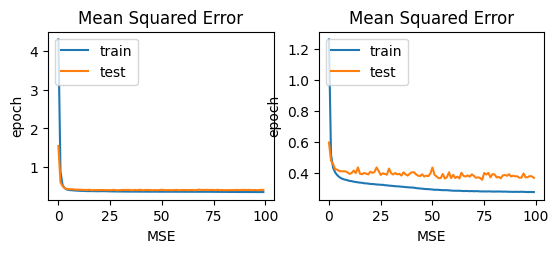

In [ ]:
plt.subplot(2,2,1)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Mean Squared Error')
plt.xlabel('MSE')
plt.ylabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2,2,2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Mean Squared Error')
plt.xlabel('MSE')
plt.ylabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

## Classification (MNIST dataset)

- 28x28 pixel 이미지에 0~9까지의 숫자가 적혀있는 손글씨 데이터셋
- 70,000개의 이미지와 레이블로 이루어져 있다

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
print(mnist.keys())

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [ ]:
x_data = mnist.data # 이미지 픽셀값
y_data = mnist.target # 해당 이미지가 나타내는 숫자 레이블

# print(x_data.shape)
# print(y_data.shape)

In [ ]:
from sklearn import model_selection

# train, test 데이터로 분할하기
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size = 0.2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # feature scaling 을 위한 함수
# 데이터 범위를 0~1 사이의 값으로 조정한다
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
# y_train, y_test의 각 클래스에 대해 이진 벡터로 변환
encoder = LabelBinarizer()
y_train_onehot = encoder.fit_transform(y_train)
y_test_onehot = encoder.fit_transform(y_test)

In [ ]:
from sklearn import metrics
from keras import layers, models

input_shape = (x_train_scaled.shape[1], )

print(input_shape) # 28 * 28 = 784

(784,)


### sequential API

In [ ]:
clf_model_seq = models.Sequential()
# 첫 번째 층은 input_shape로 입력 크기를 지정
# 두 번째 층은 이전 층의 출력 크기를 알고 있어 크기 지정 X
# activation func으로 relu와 softmax를 사용한다
clf_model_seq.add(layers.Dense(units=100, activation='relu', input_shape=input_shape))
clf_model_seq.add(layers.Dense(units=50, activation='relu'))
clf_model_seq.add(layers.Dense(units=20, activation='relu'))
clf_model_seq.add(layers.Dense(units=10, activation='softmax'))

# multi-class classification 문제 -> categorical_crossentropy 손실 함수 사용
clf_model_seq.compile(loss='categorical_crossentropy', metrics='accuracy')
clf_model_seq.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 100)               78500     
                                                                 
 dense_100 (Dense)           (None, 50)                5050      
                                                                 
 dense_101 (Dense)           (None, 20)                1020      
                                                                 
 dense_102 (Dense)           (None, 10)                210       
                                                                 
Total params: 84,780
Trainable params: 84,780
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = clf_model_seq.fit(x_train_scaled, y_train_onehot, validation_data = [x_test_scaled, y_test_onehot], batch_size = 32, epochs = 50)

Epoch 1/50
1750/1750 [==============================] - 10s 5ms/step - loss: 0.2873 - accuracy: 0.9161 - val_loss: 0.1670 - val_accuracy: 0.9509
Epoch 2/50
1750/1750 [==============================] - 8s 5ms/step - loss: 0.1237 - accuracy: 0.9635 - val_loss: 0.1297 - val_accuracy: 0.9641
Epoch 3/50
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0923 - accuracy: 0.9727 - val_loss: 0.1184 - val_accuracy: 0.9667
Epoch 4/50
1750/1750 [==============================] - 6s 4ms/step - loss: 0.0744 - accuracy: 0.9782 - val_loss: 0.1045 - val_accuracy: 0.9714
Epoch 5/50
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0627 - accuracy: 0.9818 - val_loss: 0.1125 - val_accuracy: 0.9693
Epoch 6/50
1750/1750 [==============================] - 6s 3ms/step - loss: 0.0539 - accuracy: 0.9840 - val_loss: 0.1077 - val_accuracy: 0.9735
Epoch 7/50
1750/1750 [==============================] - 6s 3ms/step - loss: 0.0472 - accuracy: 0.9862 - val_loss: 0.1252 - val_accuracy

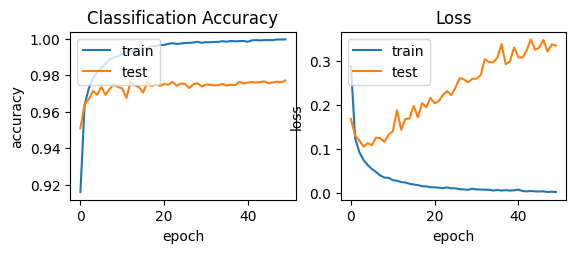

In [ ]:
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

### functional API

- layers.Input(): 입력 레이어 정의, input_shape를 통해 입력의 형태 지정
- layers.Dense()로 hidden layer를 추가한다

In [ ]:
input_shape = (x_train_scaled.shape[1], )

input = layers.Input(shape=input_shape)
hidden_1st = layers.Dense(30, activation='relu')(input)
hidden_2nd = layers.Dense(15, activation='relu')(hidden_1st)
output = layers.Dense(10, activation='softmax')(hidden_2nd)


clf_model_func = models.Model(input, output)

clf_model_func.compile(loss='categorical_crossentropy', metrics=['accuracy'])
clf_model_func.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_18 (Dense)            (None, 30)                23550     
                                                                 
 dense_19 (Dense)            (None, 15)                465       
                                                                 
 dense_20 (Dense)            (None, 10)                160       
                                                                 
Total params: 24,175
Trainable params: 24,175
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = clf_model_func.fit(x_train_scaled, y_train_onehot, validation_data = [x_test_scaled, y_test_onehot], batch_size = 32, epochs=50)

Epoch 1/50
1750/1750 [==============================] - 6s 3ms/step - loss: 0.3891 - accuracy: 0.8882 - val_loss: 0.2386 - val_accuracy: 0.9306
Epoch 2/50
1750/1750 [==============================] - 4s 2ms/step - loss: 0.2027 - accuracy: 0.9417 - val_loss: 0.2009 - val_accuracy: 0.9427
Epoch 3/50
1750/1750 [==============================] - 4s 2ms/step - loss: 0.1624 - accuracy: 0.9531 - val_loss: 0.1742 - val_accuracy: 0.9491
Epoch 4/50
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1411 - accuracy: 0.9589 - val_loss: 0.1597 - val_accuracy: 0.9554
Epoch 5/50
1750/1750 [==============================] - 4s 2ms/step - loss: 0.1269 - accuracy: 0.9636 - val_loss: 0.1547 - val_accuracy: 0.9569
Epoch 6/50
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1156 - accuracy: 0.9666 - val_loss: 0.1419 - val_accuracy: 0.9601
Epoch 7/50
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1070 - accuracy: 0.9693 - val_loss: 0.1569 - val_accuracy:

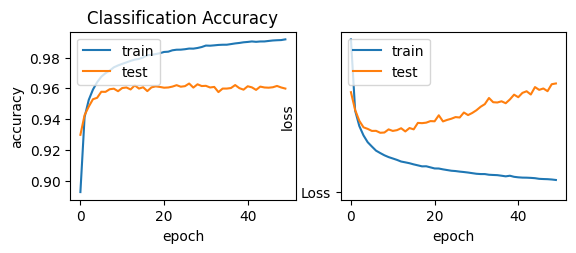

In [ ]:
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()